<a href="https://colab.research.google.com/github/Sovit1056/Pytorch_practice/blob/main/02_PyTorch_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02. Neural Network Classification with PyTorch

Classification is a problem of predicting wheather something is one thing or another( there can be multiple things as the option)

Book version: https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get it ready

In [283]:
import sklearn        #scikit-learn: It's very popular machine learning library where as pytorch is mainly focused in deep learning
from sklearn.datasets import make_circles # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

In [284]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,           # gives an array
                    random_state=42)      # similar to random seed

In [285]:
len(X), len(y)

(1000, 1000)

In [286]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [287]:
# Make Dataframes of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],    # it is dictionary
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


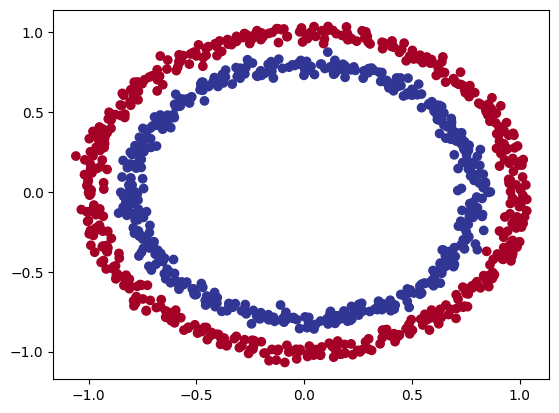

In [288]:
# Visualizing
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);


✅ c=y

* Sets the color of each point based on the values in y.

✔️ If y is:

* Categorical labels (e.g. 0 or 1): Points are colored by class.

* Continuous values: Points are colored by value on a gradient.

✅ cmap=plt.cm.RdYlBu

* cmap is the colormap used to map c values to colors.

* plt.cm.RdYlBu is a red-yellow-blue colormap:

Low values: red

Middle values: yellow

High values: blue



Note: The data we're workig with is often called a toy dataset: which is small enough to experiment but still sizeable enough to pratice the fundamentals.

### 1.1 Check input and output shape

In [289]:
X.shape, y.shape

((1000, 2), (1000,))

In [290]:
X_sample1 = X[0]
y_sample1 = y[0]

print(f" Values for 1st sample \n X: {X_sample1} \n y: {y_sample1}")
print(f" Shape of X: {X_sample1.shape} \n Shape of y: {y_sample1.shape}")

 Values for 1st sample 
 X: [0.75424625 0.23148074] 
 y: 1
 Shape of X: (2,) 
 Shape of y: ()


In [291]:
### 1.2 Trun datad into tensor and split data
import torch
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

type(X), type(y), X.dtype, y.dtype



(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [292]:
# Split the Data
# train_split= int(len(X)*0.8) # was used before and split the data manually but we can use scikit
# why so? because previously we had the linear data set but now we have the non linear data set so scikit hepl to select the data randomly

from sklearn.model_selection import train_test_split  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,      # 20% of the test data i.e 0.2
                                                    random_state=42)    # split the data randomly

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build the model to classify the blue and red dots.

TO do so:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [293]:
import torch
from torch import nn
import numpy as np

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [294]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

from ast import Module
Now we've setup device agnostic code, now create the model:

1. Subclass `nn.Module` (almost all model in PyTorch subclass `nn.Module`)
2. Create  2 `nn.linear()` layers that are capable of handaling the shapes o our data.
3. define a `forward()` methos that outlines the forward pass (or forward computation)
4. Instatiate an instance of our model class and send it to the target `device`

In [295]:
# 1. create the model - multilayer

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.linear layers capable of handling the shape of our data
    self.layer_1 = nn.Linear(in_features= 2, out_features= 5 )   # genreally in the multiple 8 # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features= 5, out_features= 1)    # takes in 5 features from previous layer defined and gives us 0ne features similar to y


  # 3. Define the forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # X -> layer 1 -> layer 2 -> y (output)

# 4. Instantiate an instance of our model class and sent it to the targete device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [296]:
next(model_0.parameters()).device

device(type='cpu')

Playground (formerly called **TensorFlow Playground** and **Deep Playground**) is a browser-based application to help you learn about and experiment with neural networks. Use Playground to visualize how changes to hyperparameters influence a machine learning model.

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.39416&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

**figma.com**: to create the figure of the model or neural network model.

In [297]:
# Let's replicate the model above using nn.Sequential
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2,
#               out_features=5),
#     nn.Linear(in_features=5,
#               out_features=1)).to(device)

# model_0



In [298]:
model_0.state_dict()  # the weight= 5*2(in*out) and bais = 5(out) for seq(0)
                      # the weight= 5*1(in*out) and bais = 1(out) for seq(1)

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

In [299]:
# Make prediction
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds= model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}")
print(f" length of test smples: {len(X_test)}, Shape of test samples: {X_test.shape}")
print(f"\n First 10 predictions: {untrained_preds[:10]}")
print(f"\n First 10 labels: {y_test[:10]}")


Length of predictions: 200, Shape of predictions: torch.Size([200, 1])
 length of test smples: 200, Shape of test samples: torch.Size([200, 2])

 First 10 predictions: tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)

 First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [300]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Creating the loss function and optimizeer

Which loss function or optimzer should we use

Again.... this is problem specific

For example for example you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or cross entropy or categorical cross entropy

And for **optimizer**, two o the most common and useful are SGD and Adam, however PyTorch have many option for building function.

###Logit:
A **Logit** is the raw output value (pre-activation) from a neural network layer before applying a sigmoid or softmax activation function.

🔬 Mathematically

* For binary classification:

  Logit is the input to the sigmoid function.

  If the output of your final linear layer is z i.e z=wx+b, then:

                  Sigmoid(𝑧) = 1/1+𝑒^−𝑧

Here, z is called the logit.

* For multi-class classification:

  The vector of outputs before softmax is called logits.

  Softmax converts logits to probabilities that sum to 1.

✅ Why is it called “logit”?
In statistics:

                  logit(𝑝)=log⁡(𝑝/(1−𝑝))

It maps probabilities (0,1) to real numbers (-∞, +∞). The logit function is the inverse of the sigmoid function. It converts a probability (between 0 and 1) back to the real number domain

In neural networks, the reverse happens:

* The model outputs logits (any real number).

* Applying sigmoid maps them to probabilities (0 to 1)



In [301]:
# Creating the loss function and optimizer
# loss_fn = nn.BCELoss # BCELoss=  requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss()            # BCEWithLogitsLoss()= sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## To calculate the accuracy

torch.eq(y_true, y_pred)

This compares each element of y_true and y_pred.

Returns a Boolean tensor with True (if equal) or False (if not equal) element-wise.

### Output: tensor([True, False, True, False])
✔️ .sum()

In PyTorch, Boolean True is treated as 1, False as 0 when using sum.

So it counts the number of correct predictions.

### Output: tensor(2)
✔️ .item()

Converts the single-element tensor result from .sum() into a Python scalar (int).

In [302]:
# Calculate Accuracy (helpful for classification problem):
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

## 3. Train model

To train our model:

1. **Forward pass:** `model_0(X_train)`
2. **Calculate the loss:** `loss= loss_fn(y_pred, y_true)`
3. **Zero gradients:** `optimizer.zero_grad()`
4. **Perform backpropagation of the loss:** `loss.backward()`
5. **Step optimizer (gradient descent):** `optimizer.step()`

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw logits (not passed through activation function / linear layers above).

We can convert these **logits** into preediction probabilities by passing them to some activation function (e.g., sigmoid for binary crossentropy and softmax for multiclass classiffication)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax()

In [303]:
# View the first 5 outputs to the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5]


tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]])

In [304]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [305]:
# Use the sigmoid activation function on our models logits to turn the into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >=0.5, `y=1` (class 1)
* `y_pred_probs` <0.5, `y=0` (class 0)

In [306]:
torch.round(y_pred_probs[:5]) # why can't we directly round the raw logits with out sigmoid activation?

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

Why is sigmoid necessary here?
* Without sigmoid

Logits have arbitrary scale, cannot interpret them as class probabilities.
* With sigmoid

Outputs are probabilities between 0 and 1, ready for thresholding to predict classes.

In [307]:
# Find the prediction labels
y_preds = torch.round(y_pred_probs)
y_preds[:5]

# In full
y_preds_lables= torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_preds_lables[:5]

# Check for equality
print(torch.eq(y_preds_lables[:5], y_preds[:5])) # need to squeeze here for extra dimension

# Get rid of extra dimension
y_preds[:5].squeeze()

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


tensor([0., 0., 0., 0., 0.])

### 3.2 Building the Train and Test loop


In [308]:
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()      # inform the training loop is carried out

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))    # turn logits-> pred probs -> pred labels

  # 2. Calculate the loss and accuracy

  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input

  loss = loss_fn(y_logits,            # nn.BCEwithLogitsLoss ecpect raw logits as input and !!!! the orders matter be careful !!!
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  if epoch % 20 == 0:
      print(f"epochs = {epoch} | loss = {loss} | accuracy = {acc}")

  # Optimize the zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step (grdient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss and accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)  # scikit define accuracy as y_true firt then y_pred, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

    # Print out what's happenin'
    if epoch % 20 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



epochs = 0 | loss = 0.6956854462623596 | accuracy = 50.0
Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test Loss: 0.69739 | Test Acc: 50.00%
epochs = 20 | loss = 0.6952154636383057 | accuracy = 50.0
Epoch: 20 | Loss: 0.69522, Accuracy: 50.00% | Test Loss: 0.69703 | Test Acc: 50.00%
epochs = 40 | loss = 0.6948307752609253 | accuracy = 50.0
Epoch: 40 | Loss: 0.69483, Accuracy: 50.00% | Test Loss: 0.69675 | Test Acc: 50.00%
epochs = 60 | loss = 0.6945160031318665 | accuracy = 50.0
Epoch: 60 | Loss: 0.69452, Accuracy: 50.00% | Test Loss: 0.69653 | Test Acc: 50.00%
epochs = 80 | loss = 0.6942583322525024 | accuracy = 50.0
Epoch: 80 | Loss: 0.69426, Accuracy: 50.00% | Test Loss: 0.69635 | Test Acc: 50.00%


## 4. Make predictions and evaluation model

From the metrics it looks loke  our model isnot learning anything......

So to inspect it we will make some predictions and make them visual!!!!

In other words, "Visualize, visualize, visualize!!!!!"

To do so, we're going to import a function  called `plot_decision_boundary()`

In [309]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # """Plots decision boundaries of model predicting on X in comparison to y.

    #Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



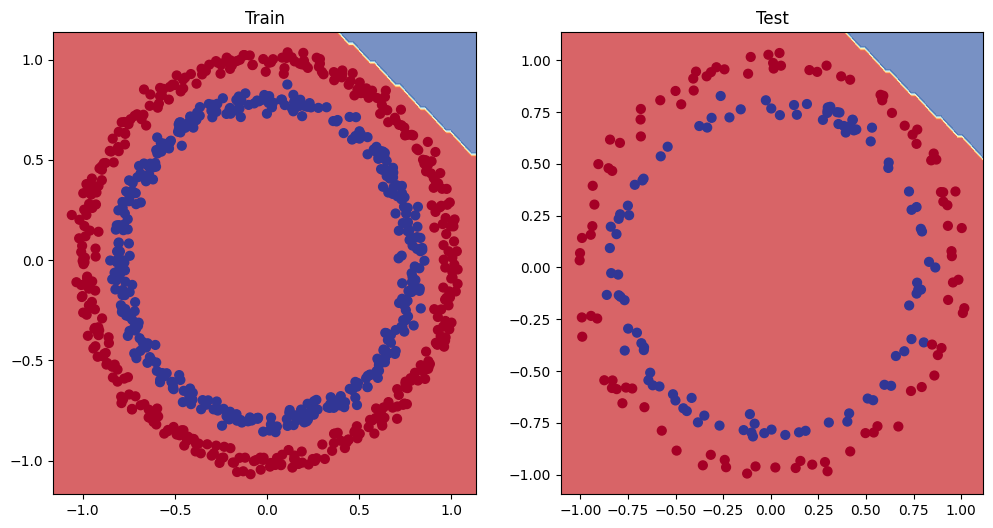

In [310]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

💡 4. Practical approach

✅ Start with ReLU in hidden layers

✅ Use Sigmoid for binary classification output

✅ Use Softmax for multi-class classification output

✅ For regression, output layer is linear (no activation)

If you face learning issues, try switching to Leaky ReLU or ELU in hidden layers. In some special architectures (e.g. LSTM, GRU), Sigmoid and Tanh are used internally due to gating mechanisms.

| Activation     | When to use                                                     | Properties                                                           |
| -------------- | --------------------------------------------------------------- | -------------------------------------------------------------------- |
| **ReLU**       | Default choice for hidden layers in most networks               | Fast convergence, prevents vanishing gradient (mostly)               |
| **Leaky ReLU** | If you face "dying ReLU problem" (many neurons outputting zero) | Allows a small negative slope                                        |
| **Sigmoid**    | Rarely used in hidden layers now                                | Causes vanishing gradients; used in output for binary classification |
| **Tanh**       | If you want outputs between -1 and 1                            | Better than Sigmoid as it’s zero-centered                            |
| **Softmax**    | Only in output layer for multi-class classification             | Converts logits to probabilities                                     |


Our model didn't work because we only given the power to use linear lines/straight line.

But we can witness that our data in circular/curved. Although our curve is simple, we need non linearity to model this dataset.

### 6.1 The missing piece: non-linearity

"What patterns could we draw if we were given an infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite(but really is finite) of linear and non-linear functions?

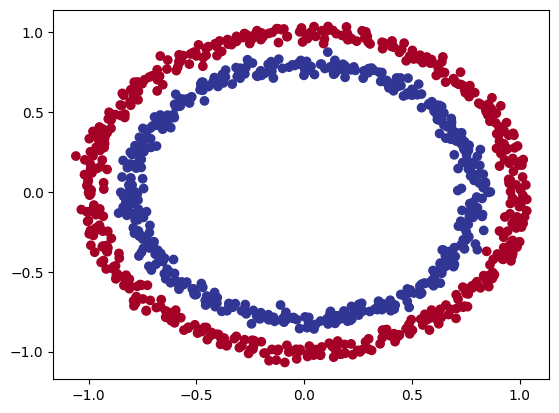

In [311]:
### 6.1 Recreating non-lineaar data (red and blue circles)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


In [312]:
# Convert data to tensors and then to train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 42)
X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

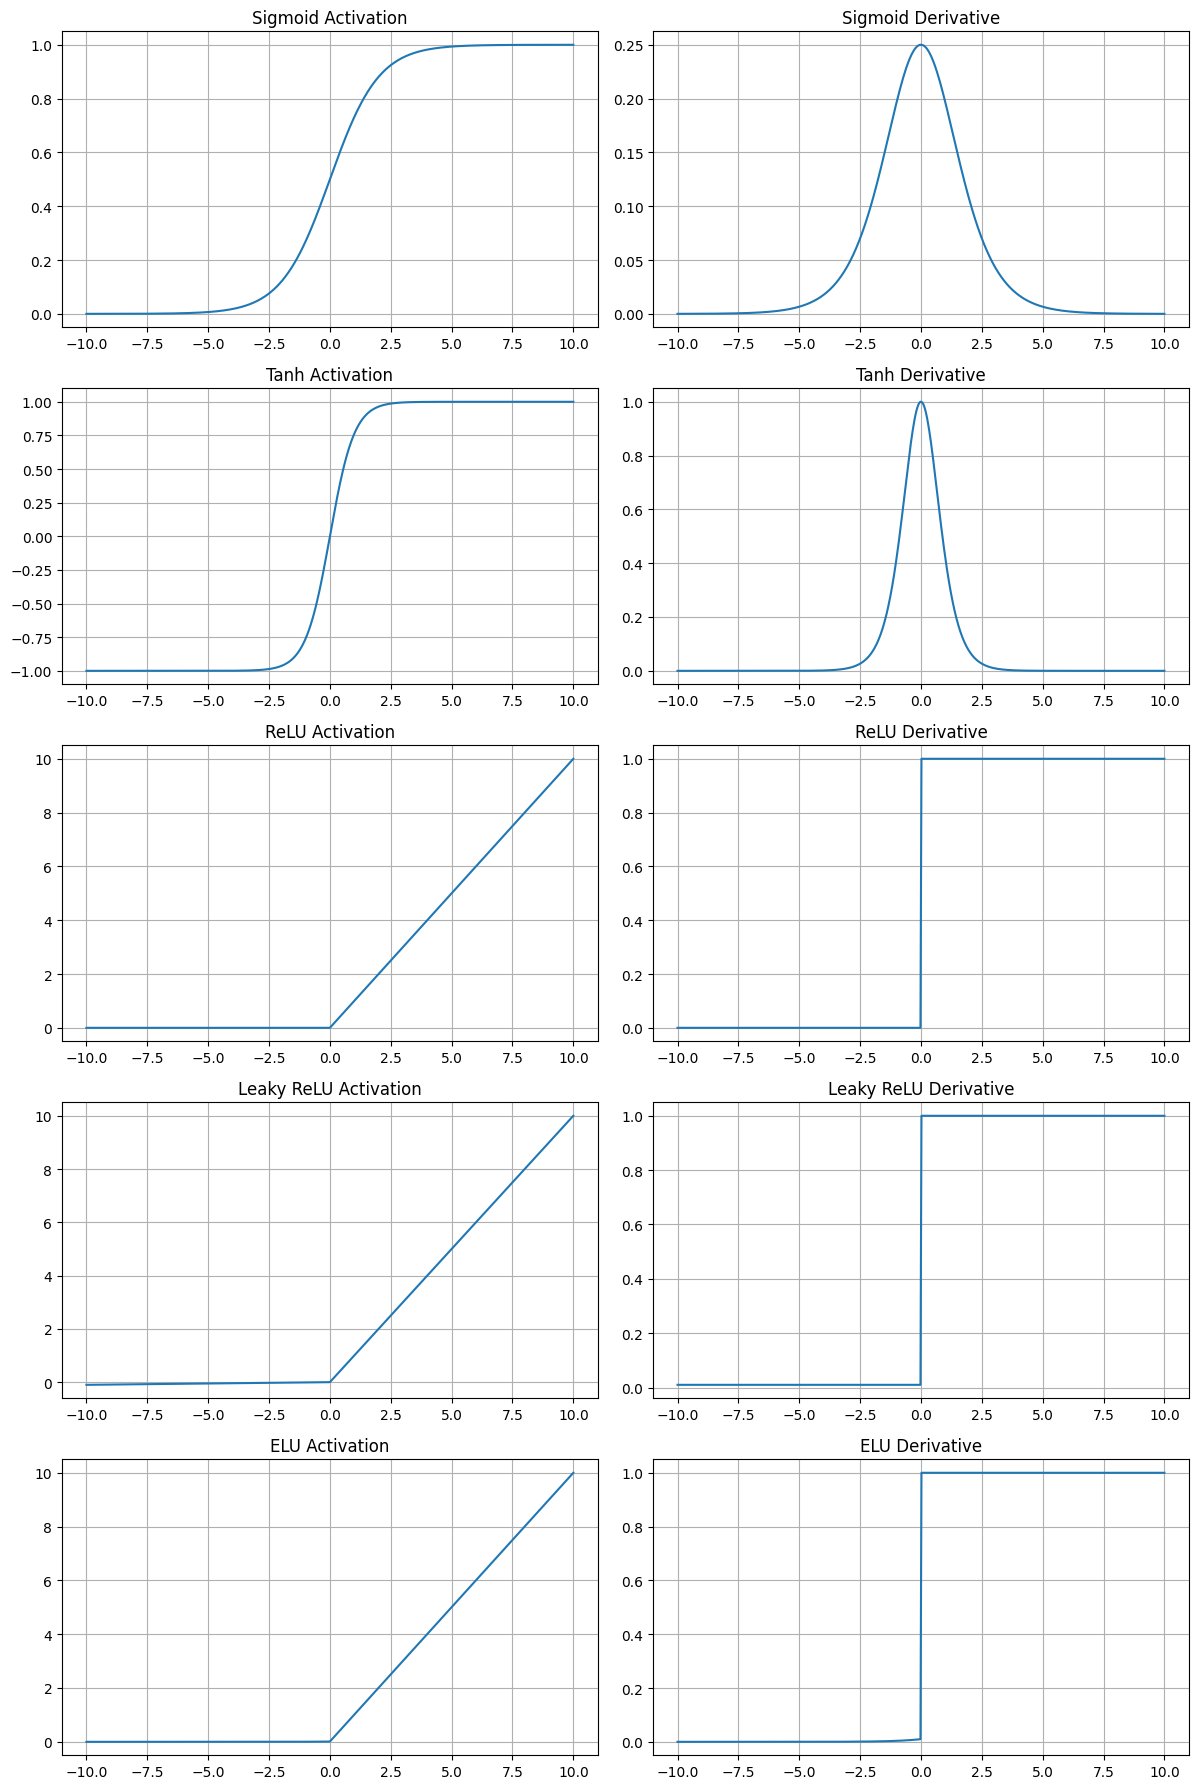

In [313]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 500)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid * (1 - sigmoid)

# Tanh
tanh = np.tanh(x)
tanh_derivative = 1 - tanh**2

# ReLU
relu = np.maximum(0, x)
relu_derivative = np.where(x > 0, 1, 0)

# Leaky ReLU
alpha = 0.01
leaky_relu = np.where(x > 0, x, alpha * x)
leaky_relu_derivative = np.where(x > 0, 1, alpha)

# ELU
elu = np.where(x > 0, x, alpha * (np.exp(x) - 1))
elu_derivative = np.where(x > 0, 1, elu + alpha)

# Plotting
plt.figure(figsize=(12, 18))

# Sigmoid
plt.subplot(5, 2, 1)
plt.plot(x, sigmoid)
plt.title("Sigmoid Activation")
plt.grid()

plt.subplot(5, 2, 2)
plt.plot(x, sigmoid_derivative)
plt.title("Sigmoid Derivative")
plt.grid()

# Tanh
plt.subplot(5, 2, 3)
plt.plot(x, tanh)
plt.title("Tanh Activation")
plt.grid()

plt.subplot(5, 2, 4)
plt.plot(x, tanh_derivative)
plt.title("Tanh Derivative")
plt.grid()

# ReLU
plt.subplot(5, 2, 5)
plt.plot(x, relu)
plt.title("ReLU Activation")
plt.grid()

plt.subplot(5, 2, 6)
plt.plot(x, relu_derivative)
plt.title("ReLU Derivative")
plt.grid()

# Leaky ReLU
plt.subplot(5, 2, 7)
plt.plot(x, leaky_relu)
plt.title("Leaky ReLU Activation")
plt.grid()

plt.subplot(5, 2, 8)
plt.plot(x, leaky_relu_derivative)
plt.title("Leaky ReLU Derivative")
plt.grid()

# ELU
plt.subplot(5, 2, 9)
plt.plot(x, elu)
plt.title("ELU Activation")
plt.grid()

plt.subplot(5, 2, 10)
plt.plot(x, elu_derivative)
plt.title("ELU Derivative")
plt.grid()

plt.tight_layout()
plt.show()


### 6.2 Building the model with non-linearity

* Artificial neural network (ANN) are the large combination of linear(straight line) and non-linear(non-straight)function which are poteential to able to pattters in data.


In [314]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=8)
    self.layer_3 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()  # relu is a non-linear activation function, which converts the negative number to zero and non-negative to as it is.

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_nl= CircleModelV1().to(device)
model_nl

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [315]:
# define loss function and optimizer

loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params=model_nl.parameters(),
                           lr=0.1)


### 6.3 Training a model with non-linearity

In [316]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data in traget device
X_test, y_test = X_test.to(device), y_test.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)

# Commencement of the loop
epochs=2000
for epoch in range(epochs):
  # Start training
  model_nl.train()

  # Forward pass
  y_logits = model_nl(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # backward propagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # Make prediction
  model_nl.eval()
  with torch.inference_mode():
    test_logits = model_nl(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70233, Accuracy: 50.00% | Test Loss: 0.70139 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69174, Accuracy: 49.88% | Test Loss: 0.69132 | Test Acc: 45.50%
Epoch: 200 | Loss: 0.69109, Accuracy: 51.38% | Test Loss: 0.69037 | Test Acc: 53.50%
Epoch: 300 | Loss: 0.69035, Accuracy: 51.38% | Test Loss: 0.68929 | Test Acc: 55.50%
Epoch: 400 | Loss: 0.68946, Accuracy: 51.50% | Test Loss: 0.68810 | Test Acc: 56.50%
Epoch: 500 | Loss: 0.68839, Accuracy: 51.88% | Test Loss: 0.68679 | Test Acc: 56.50%
Epoch: 600 | Loss: 0.68705, Accuracy: 52.00% | Test Loss: 0.68526 | Test Acc: 56.50%
Epoch: 700 | Loss: 0.68535, Accuracy: 52.25% | Test Loss: 0.68358 | Test Acc: 56.00%
Epoch: 800 | Loss: 0.68318, Accuracy: 52.75% | Test Loss: 0.68150 | Test Acc: 55.50%
Epoch: 900 | Loss: 0.68036, Accuracy: 64.75% | Test Loss: 0.67902 | Test Acc: 63.50%
Epoch: 1000 | Loss: 0.67651, Accuracy: 61.00% | Test Loss: 0.67583 | Test Acc: 62.50%
Epoch: 1100 | Loss: 0.67171, Accuracy: 58.00% | Test Loss: 0.67151

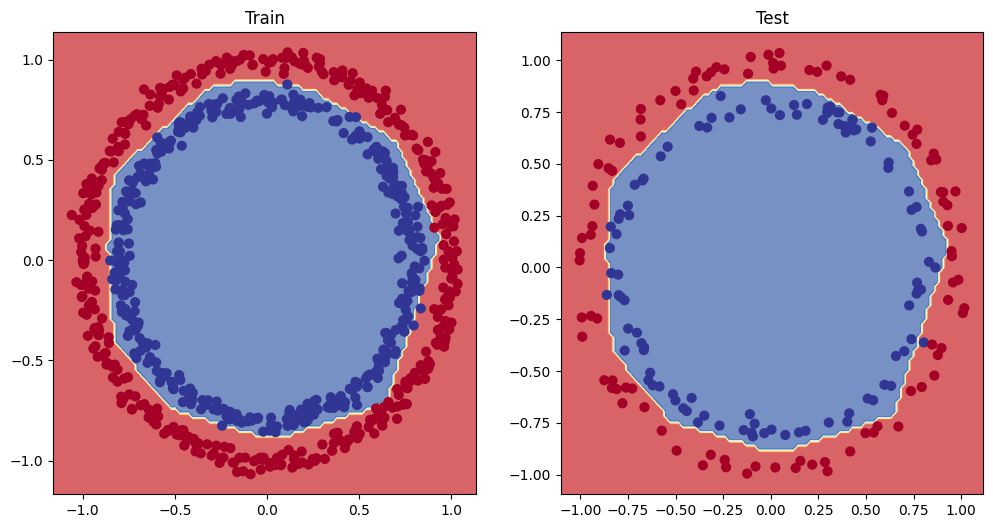

In [317]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_nl, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_nl, X_test, y_test)